In [20]:
import numpy as np
from sklearn import preprocessing, cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [31]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=column_names)

In [32]:
#check a few randomly selected rows
df.sample(15)

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
154,1190485,1,1,1,1,2,1,1,1,1,2
515,1313325,4,10,4,7,3,10,9,10,1,4
493,1142706,5,10,10,10,6,10,6,5,2,4
524,749653,3,1,1,1,2,1,2,1,1,2
294,606140,1,1,1,1,2,?,2,1,1,2
138,1183240,4,1,2,1,2,1,2,1,1,2
106,1170419,10,10,10,8,2,10,4,1,1,4
108,1171710,1,1,1,1,2,1,2,3,1,2
306,666090,1,1,1,1,2,1,3,1,1,2
172,1200772,1,1,1,1,2,1,2,1,1,2


In [33]:
#check shape
df.shape

(699, 11)

In [34]:
#drop ID column. It will not be useful for training the model
df.drop(['id'], 1, inplace=True)
df.shape

(699, 10)

In [35]:
df.replace('?',-99999, inplace=True)

In [36]:
#description of the features
df.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


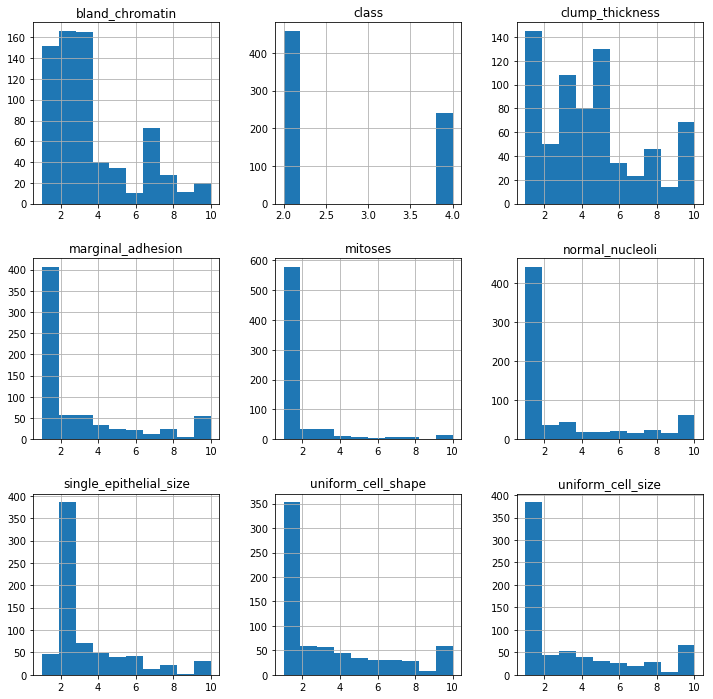

In [37]:
#plot a histogram for each variable
df.hist(figsize = (12, 12))
plt.show()

# notes

* all the values for the features are between 1 and 10

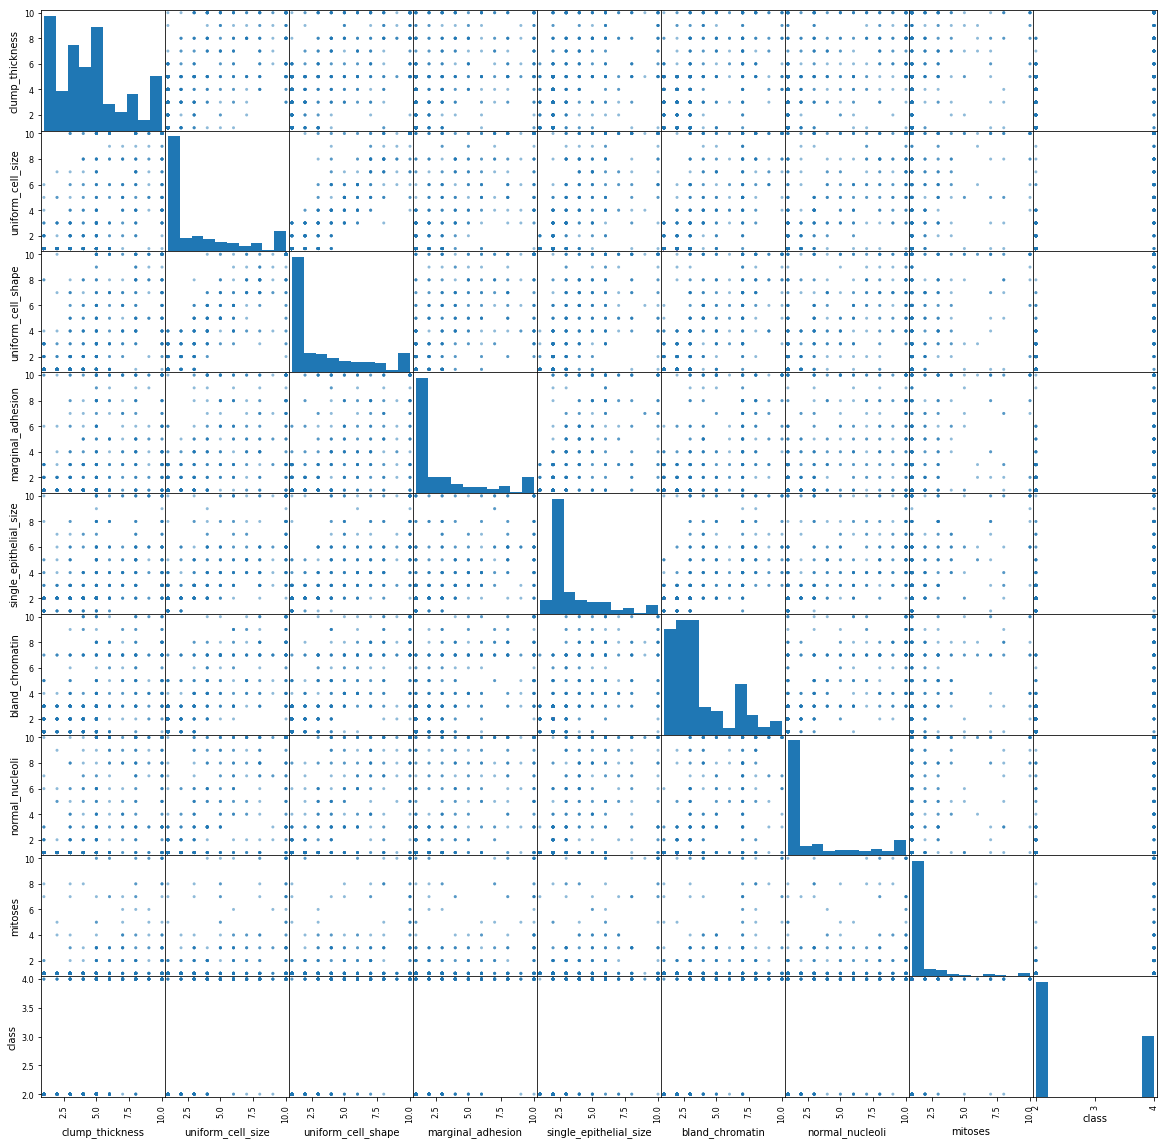

In [24]:
#plot a scatter matrix
scatter_matrix(df, figsize = (20,20))
plt.show()

# notes
* there is a linear relationship between uniform_cell_shape and uniform_cell_size
* majority of the scatter plots show no particular trend

In [38]:
#create training and test sets
X = df.drop(['class'], 1)
y = df['class']

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [42]:
#models for training
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

model_results = []
print("MODEL\t MEAN\t\t\t STD")
print("================================================")
for clf_name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = 38)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    
    print(clf_name, '\t', cv_results.mean(), '\t', cv_results.std())

MODEL	 MEAN			 STD
KNN 	 0.973149350649 	 0.0243129795209
SVM 	 0.962435064935 	 0.0186382018642
